# Evaluation of resident time #

Formula to evaluate ideal resident time for 1 reactor
$$ E(t)=\dfrac{1}{\tau}e^{-t/\tau} $$ 

Where $ \tau=\dfrac{Q}{V} $ where $Q$ is the volumetric flow rate and $V$ is the Volume.

Formula to evaluate ideal comulative time
$$ F(t) = 1-e^{-t/\tau} $$

In [1]:
import os
import numpy as np
import pandas as pd
import scipy as sp
import glob
import matplotlib.pyplot as plt 

### Diameter impact ###
Reading Numerical simualtions files

In [2]:
WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT'
WorkingDir=r'C:\Users\geron-ma\OneDrive - TUV SUD\Projects-Files\A4I-R10-025_I-Phyc\04_FLUENT\Baseline_Geometry'
scenario='Particle_size'
file_path=os.path.join(WorkingDir,scenario,'*.his')
files=glob.glob(file_path)
files

['C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\Baseline_Geometry\\Particle_size\\RTD-outlet-D_05mu_m.his',
 'C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\Baseline_Geometry\\Particle_size\\RTD-outlet-D_10mu_m.his',
 'C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\Baseline_Geometry\\Particle_size\\RTD-outlet-D_20mu_m.his',
 'C:\\Users\\geron-ma\\OneDrive - TUV SUD\\Projects-Files\\A4I-R10-025_I-Phyc\\04_FLUENT\\Baseline_Geometry\\Particle_size\\RTD-outlet-D_40mu_m.his']

In [3]:
data_frames={}  #create dictionary

In [4]:
time_array={}
RTD_array={}
N_particles={}

In [5]:
cases = []

In [6]:
for file in files:
    start=file.find('D_**mu')
    dim=file[124:124+6]
    cases.append(dim)
    data_frames[dim]=pd.read_csv(file, sep=' ', skiprows=11 , names=['t_num','E_num'])
    data_frames[dim]=data_frames[dim].iloc[:-1,:]
    N_particles[dim]=data_frames[dim]['E_num'].sum()
    print(N_particles[dim])
    time_array[dim]=data_frames[dim]['t_num'].to_numpy(dtype='float64')
    RTD_array[dim]=data_frames[dim]['E_num'].to_numpy(dtype='float64')/ N_particles[dim]

3970.0
3970.0
3967.0
3966.0


In [7]:
N_particles

{'D_05mu': 3970.0, 'D_10mu': 3970.0, 'D_20mu': 3967.0, 'D_40mu': 3966.0}

In [8]:
RTD_array
cases

['D_05mu', 'D_10mu', 'D_20mu', 'D_40mu']

## Characteristic of the reactor ##

In [9]:
#Q= 0.000347/1020   # m^3/s
Q= 2.31/998
V=3.2*2.5*3.0 # be carefull with units 
tau=V/Q
print(tau)

10368.83116883117


In [10]:
t=np.linspace (0, 65000,100)

In [11]:
E_t=(1/tau)*np.exp(-t/tau)

In [12]:
F_t=1-np.exp(-t/tau)

In [13]:
teta=t/tau
E_teta=np.exp(-teta)
E_teta_2=teta*np.exp(-teta)

In [14]:
I0={}
I1={}
tau_num={}

In [15]:
for case in cases:
    I0[case]=sp.integrate.simpson(RTD_array[case],time_array[case],axis=0)
    I1[case]=sp.integrate.simpson(RTD_array[case]*time_array[case],time_array[case],axis=0)
    tau_num[case]=I1[case]/I0[case]
    RTD_array[case]=RTD_array[case]/I0[case]

In [16]:
tau_num

{'D_05mu': 11606.59470696866,
 'D_10mu': 11496.34190233382,
 'D_20mu': 11361.47881155254,
 'D_40mu': 11487.85478212509}

In [17]:
I1

{'D_05mu': 16885953.651826948,
 'D_10mu': 16512347.432281733,
 'D_20mu': 15247941.374934917,
 'D_40mu': 15399409.101887459}

## Figure template ##

Define a dictionari for the color and a dictionary for the line stile to be used

In [18]:
col={
    cases[0]:'b',
    cases[1]:'m',
    cases[2]:'c',
    cases[3]:'g'
}
stile={
    cases[0]:'o',
    cases[1]:'v',
    cases[2]:'s',
    cases[3]:'*'
}

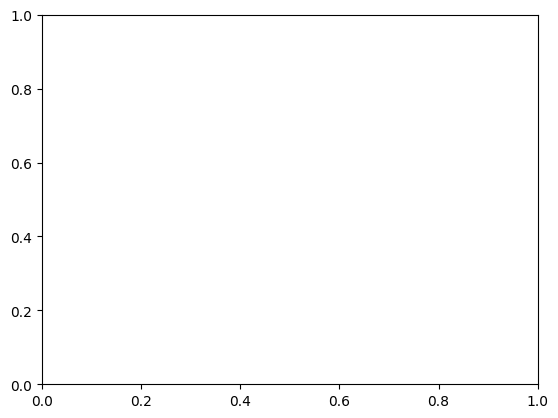

In [19]:
fig, ax = plt.subplots()

In [20]:
plt.ioff()

In [21]:
fig, ax3 = plt.subplots()

In [22]:
ax3.plot(teta, E_t*tau,label='Ideal')
ax3.plot(teta,E_teta_2, label='Ideal-N=2')
for case in cases:
    #ax3.plot(time_array[case]/tau_num[case],RTD_array[case]*tau_num[case],label=case,marker=stile[case],linestyle='--',color=col[case])
    ax3.plot(time_array[case]/tau,RTD_array[case]*tau,label=case,marker=stile[case],linestyle='--',color=col[case])

In [23]:
ax3.legend()
ax3.set_xlabel(r'$ \theta $')
ax3.set_ylabel(r'E( $ \theta $ )')
ax3.title.set_text('RTD')

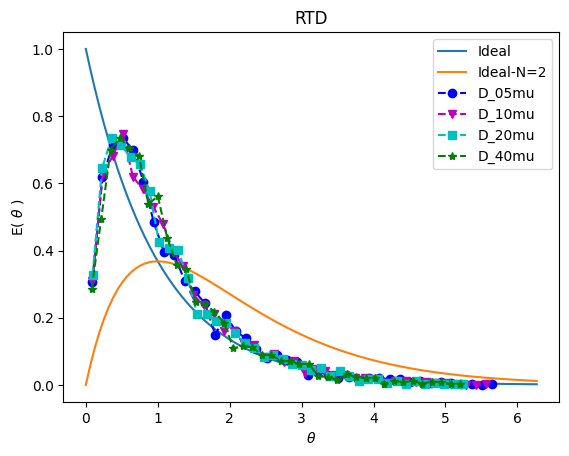

In [24]:
plt.show()

In [25]:
tau_num

{'D_05mu': 11606.59470696866,
 'D_10mu': 11496.34190233382,
 'D_20mu': 11361.47881155254,
 'D_40mu': 11487.85478212509}